<a href="https://colab.research.google.com/github/JuanPedroDelCastillo/FisicaComputacional1/blob/master/Actividad8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Actividad 8

Importar bibliotecas:

In [2]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

### Definimos Euler

In [3]:
def odeEuler(f,y0,t):
    '''Aproxima la solución de y'=f(y,t) por el método de Euler.
    
    Parámetros
    ----------
    f : La función dada por el lado derecho de la ecuación diferencial 
         y'=f(t,y), y(t_0)=y_0
    y0 : El valor inicial de y al tiempo y(t0)=y0 
    t : Arreglo unidimensional de 1D. El tamaño del paso h = t[n+1] - t[n].
    
    Regresa
    -------
    y : 1D Arreglo con la aproximación de y[n] de la solución y(t_n) calculada 
    con el método de  Euler.
    '''
    # Definimos el arreglo para las soluciones del tamaño del tiempo de integración
    y = np.zeros(len(t))
    
    # La condición inicial que debe satisfacer la solución
    y[0] = y0
    
    # LA integración por el método de Euler
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
    return y

### Definimos Runge Kutta

In [4]:
def runge_kutta(f, x_0, y_0, h):
    """Four step Runge-Kutta method (RK4)
    Solves first order ODEs
    """
    k_0 = f(x_0, y_0)
    k_1 = f(x_0 + h/2, y_0 + h/2 * k_0)
    k_2 = f(x_0 + h/2, y_0 + h/2 * k_1)
    k_3 = f(x_0 + h, y_0 + h * k_2)

    k = 1/6 * (k_0 + 2.0*k_1 + 2.0*k_2 + k_3)

    x_1 = x_0 + h
    y_1 = y_0 + h * k

    return x_1, y_1

## Ejercicio 1

Resuelva la ecuación diferencial del oscilador de Van der Pol

$$\begin{equation*}
\frac{d^2 x}{d t^2} - \mu (1 - x^2) \frac{dx}{dt } + x = 0
\end{equation*}$$
donde $x$ es la posición y $\mu$ es un parámetro de la parte no lineal.

Resuelva el caso para $\mu = 0, 1, 2, 3, 4$ y grafique las soluciones para un tiempo de integración de t = [0, 50]

Definiendo $dx / dt = v$, podemos reescribir la ecuación diferencial de segundo grado como un sistema de 2 ecuaciones de primer orden

$$\begin{eqnarray*}
\frac{dx}{dt} &=& v = f_1(t)\\
\frac{dv}{dt} &=& \mu (1 - x^2)v - x = f_2(t)\\ 
\end{eqnarray*}$$

La ecuación anterior se puede escribir vectorialmente como

$$\begin{equation*}

\frac{d}{dt} \vec{y} = \begin{bmatrix}
0 & 1 \\
-1 & \mu (1-x^2) \\
\end{bmatrix} \vec{y} = A \vec{y} = \vec{F}(t, \vec{y}) = (f_1(t), f_2(t))

\end{equation*}$$

donde

$$\begin{equation*}

\vec{y} = 
  \begin{bmatrix}
  x \\
  v \\
  \end{bmatrix}
\end{equation*}$$

In [5]:
# Definimos la función F(t,y), el lado derecho de la ecuacion diferencial
# La solución y es un arreglo 1-D, y=(theta, omega), dy/dt es un arreglo

def oscilador(y, t, mu):
        x, v = y
        dydt = [v, mu*(1-x**2)*v - x]
        return dydt

# Definimos las condiciones iniciales theta=0.2, y omega = 0 (el péndulo de "suelta")
y0 = [2, 0]


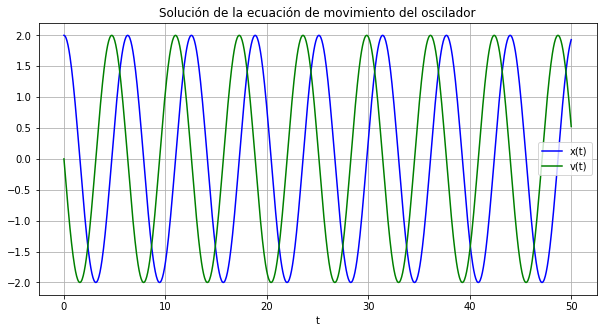

In [6]:
# Definimos el tiempo de integración de 0 a 10 segundos 
t = np.linspace(0, 50, 1000)

# Usamos el método de integración de scipy.integrate.odeint
mu = 0
y = odeint(oscilador, y0, t, args=(mu,))

plt.figure(figsize=(10,5))
plt.plot(t, y[:, 0], 'b', label='x(t)')
plt.plot(t, y[:, 1], 'g', label='v(t)')
#plt.ylim(-1.5, 1.5)
plt.legend(loc='best')
plt.title('Solución de la ecuación de movimiento del oscilador')
plt.xlabel('t')
plt.grid()
plt.show()



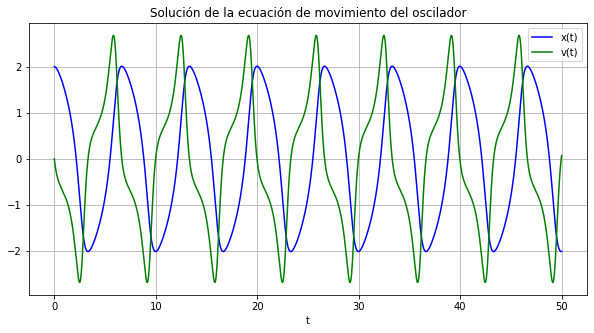

In [ ]:
# Definimos el tiempo de integración de 0 a 10 segundos (101 puntos, h=0.1)
t = np.linspace(0, 50, 5000)

# Usamos el método de integración de scipy.integrate.odeint
mu = 1
y = odeint(oscilador, y0, t, args=(mu,))

plt.figure(figsize=(10,5))
plt.plot(t, y[:, 0], 'b', label='x(t)')
plt.plot(t, y[:, 1], 'g', label='v(t)')
#plt.ylim(-1.5, 1.5)
plt.legend(loc='best')
plt.title('Solución de la ecuación de movimiento del oscilador')
plt.xlabel('t')
plt.grid()
plt.show()



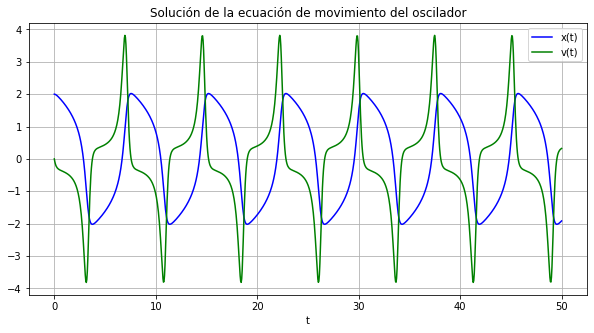

In [ ]:
# Definimos el tiempo de integración de 0 a 10 segundos (101 puntos, h=0.1)
t = np.linspace(0, 50, 1000)

# Usamos el método de integración de scipy.integrate.odeint
mu = 2
y = odeint(oscilador, y0, t, args=(mu,))

plt.figure(figsize=(10,5))
plt.plot(t, y[:, 0], 'b', label='x(t)')
plt.plot(t, y[:, 1], 'g', label='v(t)')
#plt.ylim(-1, 1.5)
plt.legend(loc='best')
plt.title('Solución de la ecuación de movimiento del oscilador')
plt.xlabel('t')
plt.grid()
plt.show()

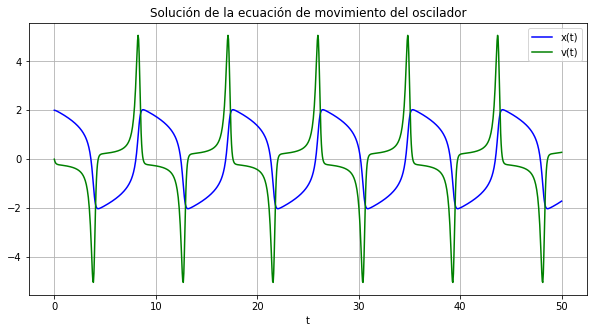

In [ ]:
# Definimos el tiempo de integración de 0 a 10 segundos (101 puntos, h=0.1)
t = np.linspace(0, 50, 1000)

# Usamos el método de integración de scipy.integrate.odeint
mu = 3
y = odeint(oscilador, y0, t, args=(mu,))

plt.figure(figsize=(10,5))
plt.plot(t, y[:, 0], 'b', label='x(t)')
plt.plot(t, y[:, 1], 'g', label='v(t)')
#plt.ylim(-1, 1.5)
plt.legend(loc='best')
plt.title('Solución de la ecuación de movimiento del oscilador')
plt.xlabel('t')
plt.grid()
plt.show()

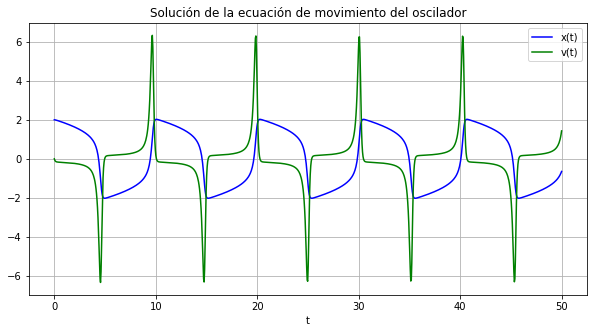

In [ ]:
# Definimos el tiempo de integración de 0 a 10 segundos (101 puntos, h=0.1)
t = np.linspace(0, 50, 1000)

# Usamos el método de integración de scipy.integrate.odeint
mu = 4
y = odeint(oscilador, y0, t, args=(mu,))

plt.figure(figsize=(10,5))
plt.plot(t, y[:, 0], 'b', label='x(t)')
plt.plot(t, y[:, 1], 'g', label='v(t)')
#plt.ylim(-1, 1.5)
plt.legend(loc='best')
plt.title('Solución de la ecuación de movimiento del oscilador')
plt.xlabel('t')
plt.grid()
plt.show()

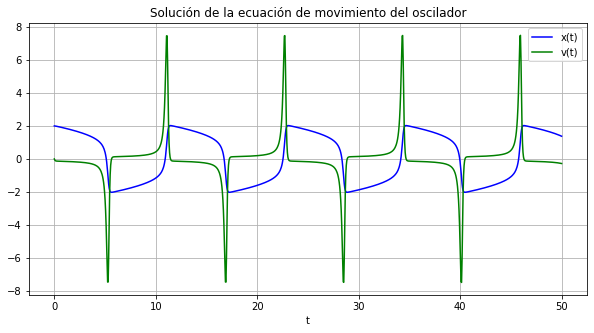

In [ ]:
# Definimos el tiempo de integración de 0 a 10 segundos (101 puntos, h=0.1)
t = np.linspace(0, 50, 1000)

# Usamos el método de integración de scipy.integrate.odeint
mu = 5
y = odeint(oscilador, y0, t, args=(mu,))

plt.figure(figsize=(10,5))
plt.plot(t, y[:, 0], 'b', label='x(t)')
plt.plot(t, y[:, 1], 'g', label='v(t)')
#plt.ylim(-1, 1.5)
plt.legend(loc='best')
plt.title('Solución de la ecuación de movimiento del oscilador')
plt.xlabel('t')
plt.grid()
plt.show()

## Ejercicio 2

Siguiendo con el ejemplo anterior del oscilador de Van de Pol, reproduce la gráfica del plano fase ($\theta, \omega$) que aparece en la Wikipedia para distintos valores de $\mu$ y se reproduce abajo.

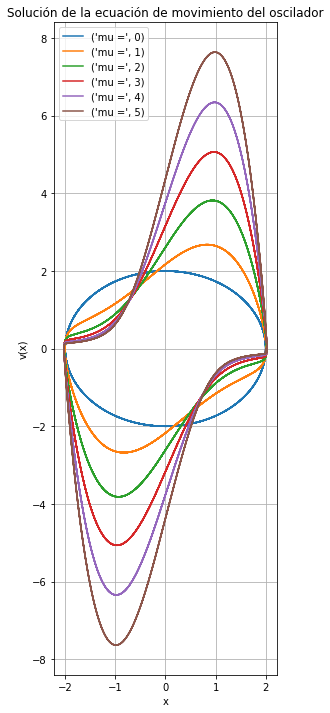

In [7]:
# Definimos el tiempo de integración de 0 a 10 segundos (101 puntos, h=0.1)
t = np.linspace(0, 50, 10000)

# Usamos el método de integración de scipy.integrate.odeint
abserr = 1.0e-8
relerr = 1.0e-6
plt.figure(figsize=(4, 12))
for mu in range(0, 6):
  y=odeint(oscilador, y0, t, args=(mu,), atol=abserr, rtol=relerr)
  plt.plot(y[:,0], y[:,1], label=('mu =', mu))
plt.legend(loc='best')
plt.title('Solución de la ecuación de movimiento del oscilador')
plt.xlabel('x')
plt.ylabel('v(x)')
plt.grid()
plt.show()

## Ejercicio 3

Encuentre las soluciones de las siguientes Ecuaciones Diferenciales Ordinarias, utilizando los siguientes métodos:

*   Método de Euler
*   Método de Runge-Kutta RK4
*   Función scipy.integrate.odeint ó scipy.integrate-solve_ivp


### Ejercicio 3.1

\begin{equation*}
\frac{d^2 x}{dt^2} + k (\frac{dx}{dt})^2 -g = 0, \ x(0)=0, \ \frac{dx}{dt}(0). = 0, \ k>0.
\end{equation*}

Definiendo $dx / dt = v$, podemos reescribir la ecuación diferencial de segundo grado como un sistema de 2 ecuaciones de primer orden

$$\begin{eqnarray*}
\frac{dx}{dt} &=& v = f_1(t)\\
\frac{dv}{dt} &=& -k v^2 + g = f_2(t)\\ 
\end{eqnarray*}$$

La ecuación anterior se puede escribir vectorialmente como

$$\begin{equation*}

\frac{d}{dt} \vec{y} = \vec{F}(t, \vec{y}) = (f_1(t), f_2(t))

\end{equation*}$$

donde

$$\begin{equation*}

\vec{y} = 
  \begin{bmatrix}
  x \\
  v \\
  \end{bmatrix}
\end{equation*}$$

In [8]:
# Primero definimos la ecuación:
def CaidaLibre(y, t, k, g):
        x, v = y
        dydt = [v, -k*v**2 + g]
        return dydt

t = np.linspace(0, 2, 21)
t0 = 0
x0 = 0
v0 = 0

k = 1
g = 9.81

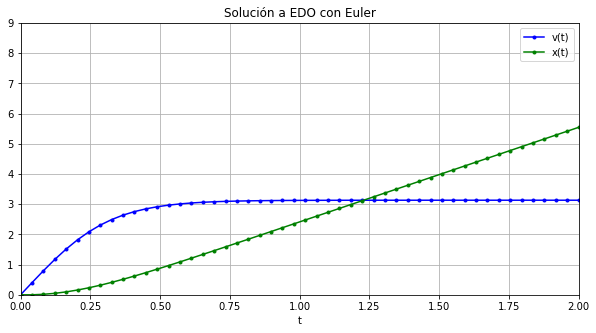

In [60]:
# Método de Euler

# Para resolver la primera ecuación:

f = lambda v,t: -k*v**2 + g 
v = np.zeros(len(t))
v[0] = v0
    
for n in range(0,len(t)-1):
  v[n+1] = v[n] + f(v[n],t[n])*(t[n+1] - t[n])

# Para resolver la segunda ecuación:

x = np.zeros(len(t))
x[0] = x0
    
for n in range(0,len(t)-1):
  x[n+1] = x[n] + v[n]*(t[n+1] - t[n])


plt.figure(figsize=(10,5))
plt.plot(t,v,'b.-', t,x,'g.-')
plt.legend(['v(t)', 'x(t)'])
plt.title('Solución a EDO con Euler')
plt.axis([0,2,0,9])
plt.grid()
plt.xlabel('t')
plt.show()


In [51]:
def runge_kutta(f, x_0, y_0, h):
    """Four step Runge-Kutta method (RK4)
    Solves first order ODEs
    """
    k_0 = f(x_0, y_0)
    k_1 = f(x_0 + h/2, y_0 + h/2 * k_0)
    k_2 = f(x_0 + h/2, y_0 + h/2 * k_1)
    k_3 = f(x_0 + h, y_0 + h * k_2)

    k = 1/6 * (k_0 + 2.0*k_1 + 2.0*k_2 + k_3)

    x_1 = x_0 + h
    y_1 = y_0 + h * k

    return x_1, y_1



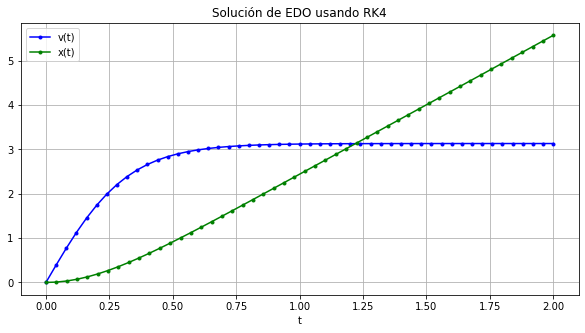

In [57]:
# Método de Runge-Kutta RK4

a = 0
b = 2.0 
Npts = 50
h = (b-a)/Npts

t0 = 0
x0 = 0
v0 = 0
k = 1
g = 9.81
t=0
v=0

t_values.clear()
v_values.clear()

# Para resolver la primera ecuación:

f = lambda t,v: -k*v**2 + g 

t_values = [t0]
v_values = [v0]

# Calcula la solución con RK4

for _ in range(Npts):
  t, v = runge_kutta(f, t, v, h)

  t_values.append(t)
  v_values.append(v)

# No podemos integrar la segunda ecuación porque no tenemos una ecuación
# explícita que dependa de x y t. Conocemos algunos puntos discretos de v pero
# no conocemos una ecuación de v en términos de x y t.
# Por lo tanto, usaremos solve_ivp para esta ecuación:

# definimos la función F de lado derecho de la ecuación.
def VanderPol(t,y,k,g):
      dydt = [y[1], -k*(y[1])**2 + g]
      return dydt

# Paso de integración h = (tmax-t0)/Npts
t0=0
tmax=2.0
Npts=50

# Definimos las condiciones iniciales 
t_0 = 0.0
y_0 = [x0, v0]

# Definimos el tiempo de integración de 0 a 10 segundos (101 puntos, h=0.1)
t = np.linspace(t0,tmax,Npts)

abserr = 1.0e-8
relerr = 1.0e-6

sol = solve_ivp(lambda t, y, mu: VanderPol(t, y, k, g),(t0,tmax), y0=y_0, 
                method='RK45', t_eval=t, args=(mu,), rtol=relerr, atol=abserr)
x=sol.y[0]

# Graficar la solución

plt.figure(figsize=(10,5))
plt.plot(t_values,v_values,'b.-', label='v(t)')
plt.plot(t,x,'g.-', label='x(t)')
plt.legend(loc='best')
plt.grid()
plt.title("Solución de EDO usando RK4")
plt.xlabel('t')
plt.show()

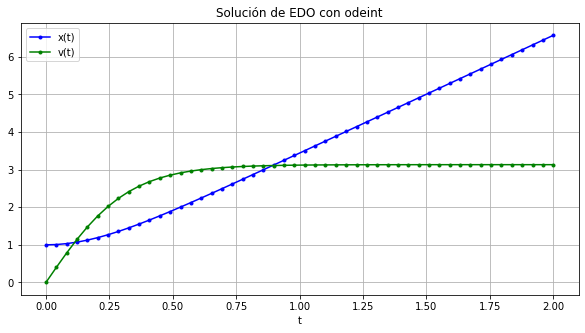

In [61]:
# Función scipy.integrate.odeint

t0=0
tmax=2.0
Npts=50

t = np.linspace(t0,tmax,Npts)

# Definimos las condiciones iniciales 
x_0 = 0.0
a_0 = [1.0, 0.0]

# Definimos los errores de tolerancia para la solución
abserr = 1.0e-8
relerr = 1.0e-6

sol=odeint(CaidaLibre, a_0, t, args=(k,g), atol=abserr, rtol=relerr)
#print(t)
#print(sol[:,0],sol[:,1])

# La solución regresa ambas x(t) y v(t)
y1=sol[:,0]
y2=sol[:,1]

plt.figure(figsize=(10,5))
plt.plot(t, y1, 'b.-', label='x(t)')
plt.plot(t, y2, 'g.-', label='v(t)')
plt.legend(loc='best')
plt.title('Solución de EDO con odeint')
plt.xlabel('t')
plt.grid()
plt.show()

### Ejercicio 3.2

\begin{equation*}
\frac{d^2 y}{d x^2} + \frac{2}{x} \frac{dy}{dx} + y^5 =0, \ y(0) = 1, \ \frac{dy}{dx}(0)=0. 
\end{equation*}

Definiendo $dy / dx = v$, podemos reescribir la ecuación diferencial de segundo grado como un sistema de 2 ecuaciones de primer orden

$$\begin{eqnarray*}
\frac{dy}{dx} &=& v = f_1(x)\\
\frac{dv}{dx} &=& -\frac{2}{x}v -y^5 = f_2(x)\\ 
\end{eqnarray*}$$

La ecuación anterior se puede escribir vectorialmente como

$$\begin{equation*}

\frac{d}{dx} \vec{a} = \vec{F}(x, \vec{a}) = (f_1(x), f_2(x))

\end{equation*}$$

donde

$$\begin{equation*}

\vec{a} = 
  \begin{bmatrix}
  y \\
  v \\
  \end{bmatrix}
\end{equation*}$$

No podemos usar ni el método de Euler ni el método de Runge-Kutta porque las ecuaciones de primer orden no dependen unicamente de 2 variables.

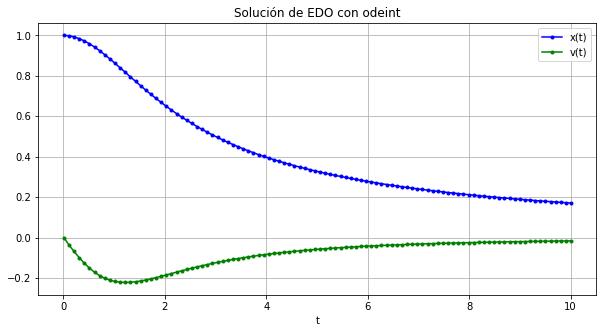

In [65]:
# Función scipy.integrate.odeint

# Primero definimos la ecuación:
def Ode(a, x):
        y, v = a
        dadx = [v, -(2/x)*v -y**5]
        return dadx

x0 = 0.1
y0 = 1.0
v0 = 0
x = np.linspace(0.01, 10.01, 100)

# Definimos las condiciones iniciales 
x_0 = x0
a_0 = [y0, v0]

# Definimos los errores de tolerancia para la solución
abserr = 1.0e-8
relerr = 1.0e-6

sol=odeint(Ode, a_0, x, atol=abserr, rtol=relerr)
#print(t)
#print(sol[:,0],sol[:,1])

# La solución regresa ambas x(t) y v(t)
y1=sol[:,0]
y2=sol[:,1]

plt.figure(figsize=(10,5))
plt.plot(x, y1, 'b.-', label='x(t)')
plt.plot(x, y2, 'g.-', label='v(t)')
plt.legend(loc='best')
plt.title('Solución de EDO con odeint')
plt.xlabel('t')
plt.grid()
plt.show()

### Ejercicio 3.3

$$\begin{equation*}
\frac{d^3 y}{d x^3} = (x-1)^2 + y^2 + \frac{dy}{dx} -2, \ y(0)=1, \ y'(0)=0, \ y''(0)=2.
\end{equation*}$$

Definiendo $dy / dx = v$, $dv / dx = a$, podemos reescribir la ecuación diferencial de segundo grado como un sistema de 2 ecuaciones de primer orden

$$\begin{eqnarray*}
\frac{dy}{dx} &=& v = f_1(x)\\
\frac{dv}{dx} &=& a = f_2(x)\\
\frac{da}{dx} &=& (x-1)^2 + y^2 + v - 2 = f_3(x)\\ 
\end{eqnarray*}$$

La ecuación anterior se puede escribir vectorialmente como

$$\begin{equation*}

\frac{d}{dx} \vec{b} = \vec{F}(x, \vec{b}) = (f_1(x), f_2(x), f_3(x))

\end{equation*}$$

donde

$$\begin{equation*}

\vec{b} = 
  \begin{bmatrix}
  y \\
  v \\
  a \\
  \end{bmatrix}
\end{equation*}$$

No podemos usar ni el método de Euler ni el método de Runge-Kutta porque las ecuaciones de primer orden no dependen unicamente de 2 variables.

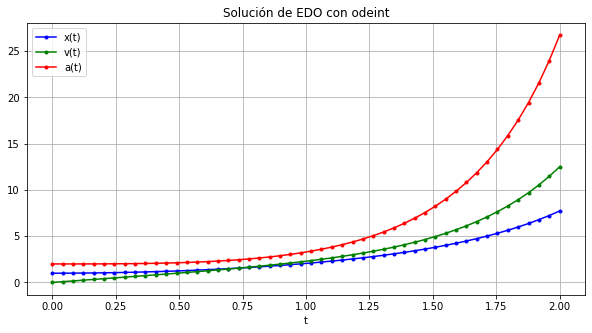

In [70]:
# Función scipy.integrate.odeint

# Primero definimos la ecuación:
def Ode1(b, x):
        y, v, a = b
        dbdx = [v, a, (x-1)**2 + y**2 + v - 2]
        return dbdx

x0 = 0.0
y0 = 1.0
v0 = 0.0
a0 = 2.0
x = np.linspace(0.0, 2.0, 50)

# Definimos las condiciones iniciales 
x_0 = x0
a_0 = [y0, v0, a0]

# Definimos los errores de tolerancia para la solución
abserr = 1.0e-8
relerr = 1.0e-6

sol=odeint(Ode1, a_0, x, atol=abserr, rtol=relerr)
#print(t)
#print(sol[:,0],sol[:,1])

# La solución regresa ambas x(t) y v(t)
y1=sol[:,0]
y2=sol[:,1]
y3=sol[:,2]

plt.figure(figsize=(10,5))
plt.plot(x, y1, 'b.-', label='x(t)')
plt.plot(x, y2, 'g.-', label='v(t)')
plt.plot(x, y3, 'r.-', label='a(t)')
plt.legend(loc='best')
plt.title('Solución de EDO con odeint')
plt.xlabel('t')
plt.grid()
plt.show()